### Packages and Imports

In [1]:
import torch
import pandas as pd
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

from utils.instruments import Stock, RiskFactor
from utils.data_handler import YahooDataHandler
from models.ar import AR
from models.garch import GARCH

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

### Financial Data

In [2]:
ydh = YahooDataHandler()

ticker = "GS"

# Start and end dates.
start = datetime.strptime("2005-05-01", r"%Y-%m-%d")
end = datetime.strptime("2023-06-01", r"%Y-%m-%d")

price_history = ydh.get_price_history(ticker, start, end)
identifier = f"{ticker}_RF"
risk_factor = RiskFactor(identifier, price_history)
stock = Stock(identifier=ticker, risk_factors=[risk_factor])

data = risk_factor.price_history.log_returns

[*********************100%***********************]  1 of 1 completed


In [3]:
ar_model = AR(data)
ar_model.calibrate()
print(ar_model.parameters)

[-0.055073339492082596, 0.0038950222078710794, 0.0003181591455359012, 0.022512584924697876]


In [4]:
ar_model.aic

tensor(-24765.1270)

In [5]:
ar_model.bic

tensor(-24739.4336)

In [6]:
garch_model = GARCH(data)
garch_model.calibrate()

In [7]:
torch.sqrt(garch_model._long_run_variance) * 100

tensor(2.2510)

tensor(1.6208)

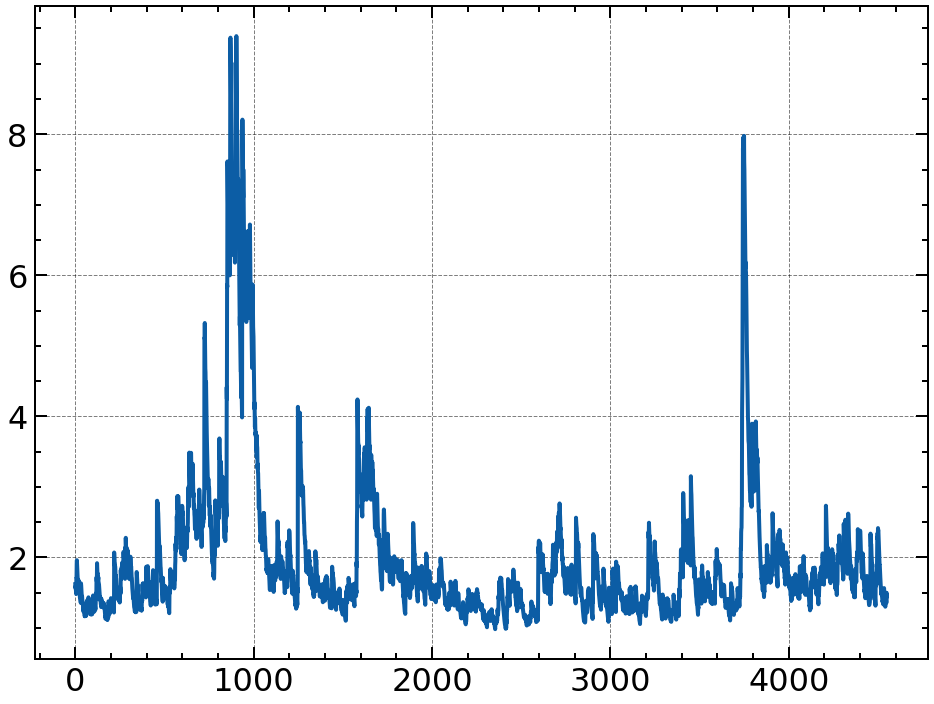

In [8]:
garch_model._solution
vol = garch_model._compute_variance(parameters=torch.tensor(garch_model._solution.x))
plt.plot(torch.sqrt(vol)*100)
torch.sqrt(garch_model._initial_variance) * 100

In [9]:
garch_model._solution

      fun: -32102.428569649794
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.00798940e-05, -3.92041174e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([4.45567597, 2.47339067])

In [10]:
ar_model._log_likelihood

tensor(12386.5635)

In [11]:
torch.tensor([1,2]).numpy()

array([1, 2])

In [12]:
garch_model._solution.fun

-32102.428569649794

In [13]:
garch_model.aic

tensor(-23732.2500)

In [14]:
garch_model.bic

tensor(-23712.9805)

In [15]:
ar_model.bic

tensor(-24739.4336)

In [16]:
ar_model.aic

tensor(-24765.1270)

In [17]:
ar_model._log_likelihood

tensor(12386.5635)

In [18]:
garch_model._log_likelihood

tensor(11869.1250)

In [19]:
garch_model._solution.fun

-32102.428569649794

In [20]:
garch_model.transform_to_uniform()

tensor([0.4788, 0.8757, 0.2826,  ..., 0.9655, 0.4060, 0.1744])

In [21]:
from torch.distributions import Uniform


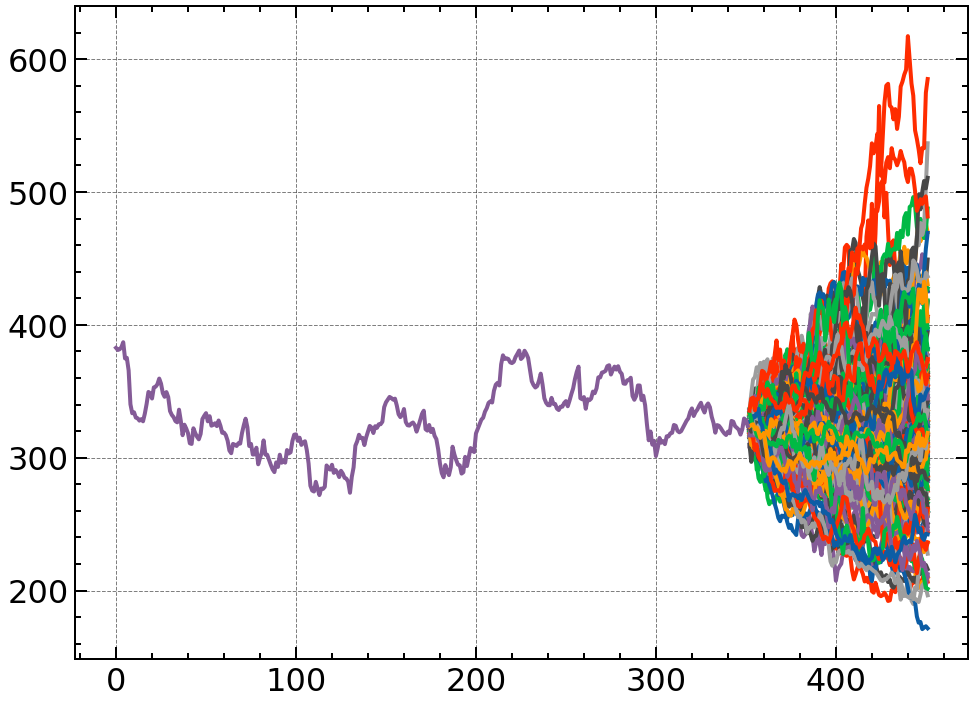

In [41]:
for _ in range(200):
    S0 = torch.tensor(price_history.mid_history[-1])
    randoms = Uniform(0, 1).rsample((100,))
    returns = garch_model.transform_to_true(randoms)

    t1 = range(len(price_history.mid_history[4200:]))
    t2 = range(len(t1), len(returns)+len(t1))
    plt.plot(t2, torch.exp(torch.cumsum(returns, dim=0)) * S0)
plt.plot(t1, price_history.mid_history[4200:])
    

In [23]:
garch_model.aic

tensor(-23732.2500)

In [24]:
garch_model.bic

tensor(-23712.9805)

In [25]:
garch_model._log_likelihood

tensor(11869.1250)

In [31]:
import arch
model = arch.arch_model(data, vol='GARCH', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4504038740.541497
Iteration:      2,   Func. Count:     18,   Neg. LLF: -11869.03839291822
Optimization terminated successfully    (Exit mode 0)
            Current function value: -11869.03840279366
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


/Users/axelnilsson/Desktop/Abacus/venv/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005066. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [32]:
results.bic

-23704.384396515252

In [33]:
results.params

mu          0.000666
omega       0.000010
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64

In [34]:
torch.mean(torch.tensor(data))*100

tensor(0.0306, dtype=torch.float64)

In [35]:
garch_model.parameters

(0.07990983594840659, 0.9085448609316253, 0.0005067051388323307)

In [11]:
import numpy as np
import pandas as pd


In [16]:
A = np.random.random((16,10))
df = pd.DataFrame(A, columns=[a*i for i in range(10)])

ValueError: Shape of passed values is (16, 10), indices imply (16, 0)